In [1]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# --- 2. Load Dataset ---
df = pd.read_csv("data.csv")

In [4]:
# --- 3. Quick Look ---
print("Initial Data:")
display(df.head())
print("\nInfo:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

Initial Data:


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB
None

Missing values per column:
#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed          

In [5]:
# --- 4. Data Cleaning ---
# Fill missing Type 2 with "None"
df['Type 2'] = df['Type 2'].fillna("None")

# Fix column name inconsistency (if any weird characters in 'Name')
df['Name'] = df['Name'].str.encode('ascii', 'ignore').str.decode('ascii')

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Encode categorical columns (Type 1, Type 2, Legendary)
label_encoders = {}
for col in ['Type 1', 'Type 2', 'Legendary']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [6]:
# --- 5. Define Features and Target ---
# Let's predict 'Legendary' status based on stats
X = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
y = df['Legendary']

In [7]:
# --- 6. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# --- 7. Train Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# --- 8. Evaluate Model ---
y_pred = model.predict(X_test)
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.9625

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       150
           1       0.64      0.90      0.75        10

    accuracy                           0.96       160
   macro avg       0.82      0.93      0.86       160
weighted avg       0.97      0.96      0.97       160



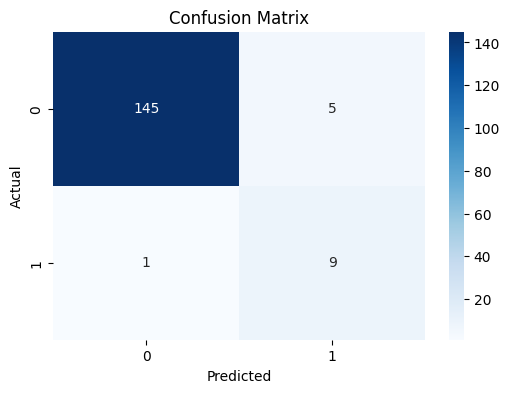

In [10]:
# --- 9. Confusion Matrix Visualization ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

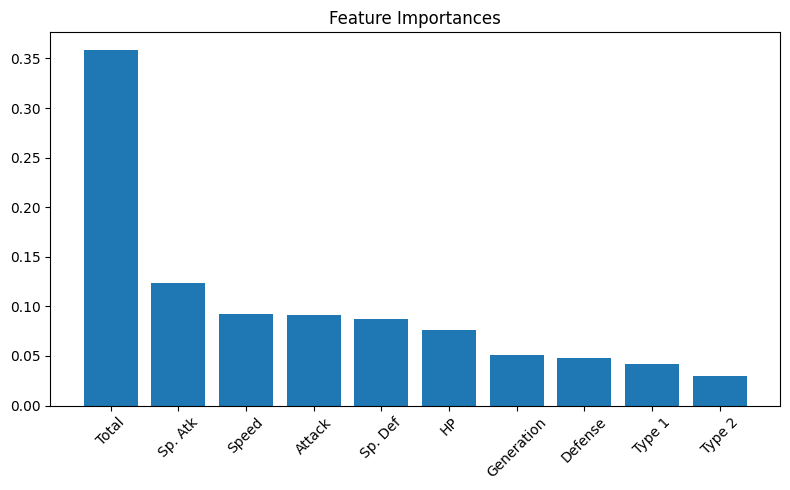

In [11]:
# --- 10. Feature Importance ---
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

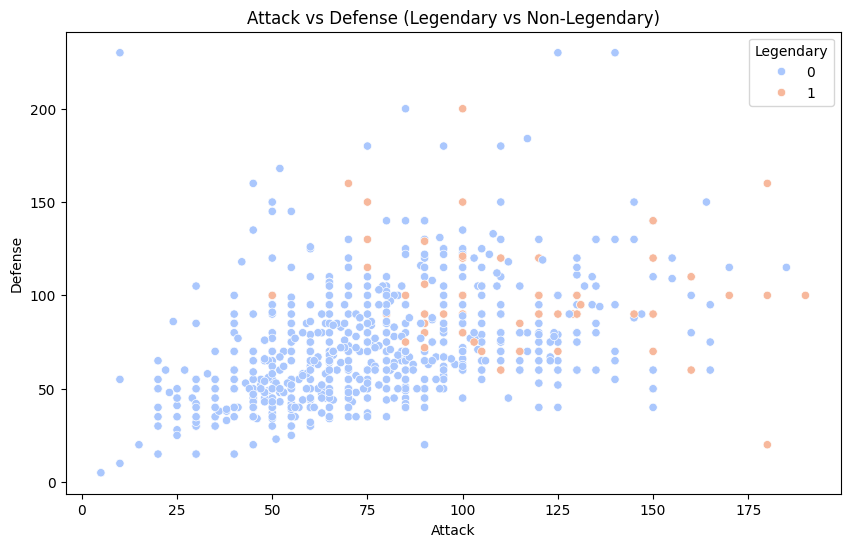

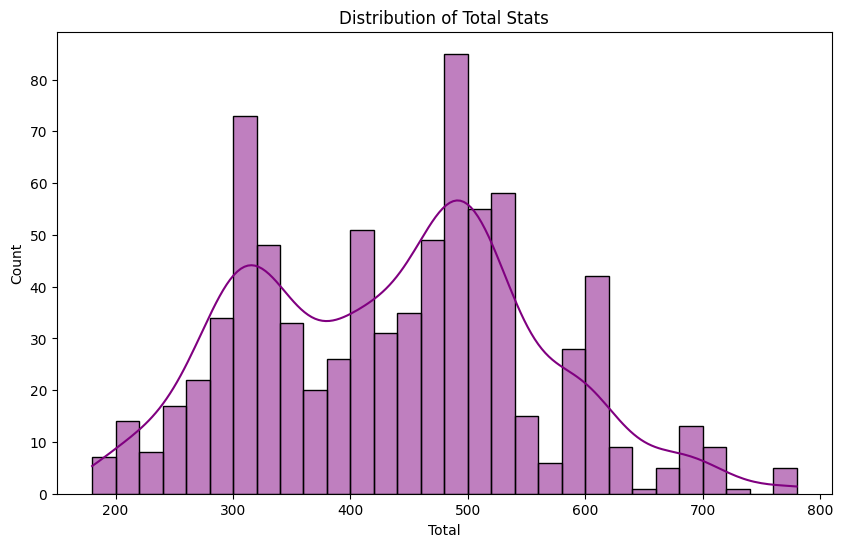

In [12]:
# --- 11. Data Visualization ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='Attack', y='Defense', hue='Legendary', data=df, palette='coolwarm')
plt.title("Attack vs Defense (Legendary vs Non-Legendary)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['Total'], bins=30, kde=True, color='purple')
plt.title("Distribution of Total Stats")
plt.show()

In [13]:
# --- 12. Save Cleaned Data ---
df.to_csv("pokemon.csv", index=False)
print("\nCleaned data saved as cleaned_data.csv")


Cleaned data saved as cleaned_data.csv
